# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

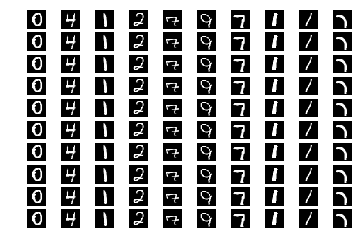

In [121]:
def P1(num_examples=10):

### STUDENT START ###
    # going through all the digits available
    for i in range(0,10):
        # setting up 10 columns
        for j in range(0,10):
            plt.subplot(10,10,i*10+j+1)
            # redering and reshaping to 28x28 ,'gray'
            plt.imshow(mini_train_data[j].reshape(28,28), cmap='gray')
            plt.axis('off')

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [50]:
def P2(k_values):

### STUDENT START ###

# kNN model 
    # going through all k values
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        #fitting the model 
        model.fit(mini_train_data, mini_train_labels)
        test_predicted_labels = classification_report(model.predict(dev_data), dev_labels)
        # model.score() will return mean accuracy of self.predict(X) wrt. y. OR.... dependent value
        print("k =",k, "accuracy =", model.score(X = dev_data, y = dev_labels))
        print(test_predicted_labels)
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1 accuracy = 0.884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.98      0.89      0.93       131
           2       0.79      0.90      0.84        93
           3       0.87      0.93      0.90        90
           4       0.85      0.91      0.88        86
           5       0.88      0.86      0.87        90
           6       0.92      0.92      0.92       102
           7       0.94      0.85      0.89       113
           8       0.77      0.83      0.80        87
           9       0.86      0.80      0.83       102

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 3 accuracy = 0.876
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.98      0.82      0.90       141
           2       0.78      0.9

**ANSWER:** Based on reviewing the the precision, recall, F1 score of all the outputs, numerical digits 8 and 2 had the most difficulty. In terms of accuracy, k=1 had the highest value with 0.884 and k=5 had the next highest accuracy with 0.882.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [127]:
def P3(train_sizes):

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors=1)
    for i in train_sizes:
        #fitting the model 
        begin = time.time()
        model.fit(train_data[:i], train_labels[:i])
        end = time.time()
        score = model.score(X = dev_data, y = dev_labels)
        print("size =",i, "accuracy =", score, "time =", end-begin)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
P3(train_sizes)

size = 100 accuracy = 0.702 time = 0.06983709335327148
size = 200 accuracy = 0.791 time = 0.005082130432128906
size = 400 accuracy = 0.811 time = 0.007892847061157227
size = 800 accuracy = 0.866 time = 0.023389816284179688
size = 1600 accuracy = 0.905 time = 0.04268312454223633
size = 3200 accuracy = 0.927 time = 0.11640501022338867
size = 6400 accuracy = 0.939 time = 0.33631086349487305
size = 12800 accuracy = 0.952 time = 1.2813520431518555
size = 25600 accuracy = 0.963 time = 7.049731254577637


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

In [129]:
# since I didn't use accuracy in problem 2, I had to re-write the P3 function to append accuracy in accuracies.
def P3b(train_sizes, accuracies):
    model = KNeighborsClassifier(n_neighbors=1)
    for i in train_sizes:
        #fitting the model 
        model.fit(train_data[:i], train_labels[:i])
        accuracy = round(np.sum(model.predict(dev_data)==dev_labels)/1000,2)
        accuracies.append(accuracy)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3b(train_sizes, accuracies)

Score for 60000 size :  1.230114694617253 

Score for 120000 size :  1.6254142141372296 

Score for 1000000 size :  7.423140500430221 



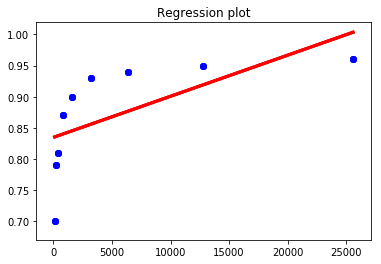

In [213]:
def P4():

### STUDENT START ###
    # using train_sizes from P3
    scale_train = np.asarray(train_sizes).reshape(-1,1)
    # using accuracies from P3b
    scale_accuracy = np.asarray(accuracies).reshape(-1,1)
    reg = LinearRegression()
    reg.fit(scale_train, scale_accuracy)
    for i in (60000, 120000, 1000000):
        outcome = reg.predict([[i]])
        print("Score for", i, "size : ", outcome[0][0],"\n")
        plt.scatter(scale_train, scale_accuracy, color='blue')
        plt.plot(scale_train, reg.predict(scale_train), color='red', linewidth=3)
        plt.title("Regression plot")
    
### STUDENT END ###

P4()

Accuracy for 60000 size :  1.032572662064096 

Accuracy for 120000 size :  1.0632393287307627 

Accuracy for 1000000 size :  1.1570454018617387 



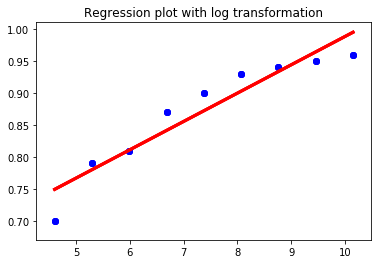

In [212]:
# Applying log transfomration to the train_sizes
def P4b():

### STUDENT START ###
    # applying log to train_sizes from P3
    log_train_sizes = np.log(train_sizes)
    log_scale_train = np.asarray(log_train_sizes).reshape(-1,1)
    # using accuracies from P3b
    scale_accuracy = np.asarray(accuracies).reshape(-1,1)
    log_reg = LinearRegression()
    log_reg.fit(log_scale_train, scale_accuracy)
    for i in (60000, 120000, 1000000):
        log_outcome = log_reg.predict([[np.log(i)]])
        print("Accuracy for", i, "size : ", log_outcome[0][0],"\n")
        plt.scatter(log_scale_train, scale_accuracy, color='blue')
        plt.plot(log_scale_train, log_reg.predict(log_scale_train), color='red', linewidth=3)
        plt.title("Regression plot with log transformation")
    
### STUDENT END ###

P4b()

**ANSWER:**

Running linear regression on 60k sample size returned around ~123% accuracy, which seems impossible. The accuracy only goes up as we increase the sample size. Most likely, this is an issue with the fit of the underlying data. To be explicit, the model does not know that 1.00 is the max value of the regression's dependent and the scale of x and y is drastically different. One of the most popular method to address this issue is to take the log of the problematic data, X. 

Applying the log transformation to the X did look better and the accuracy for the 60,000 size was closer to 100% (~103%). There will be other transformations like log-log, inverse-log, and square root that might be able to generate the desired output of < 100% accuracy.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion Matrix: 
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


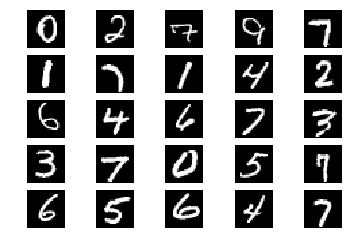

In [22]:
def P5():

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    # evaluating performance with dev_data/dev_labels in confusion_matrix
    print("Confusion Matrix: \n",confusion_matrix(dev_labels, model.predict(dev_data)))
    # displaying images of incorrect digits
    counter = 1
    for i in np.where(mini_train_labels != model.predict(dev_data))[0]:
        plt.subplot(5,5,counter)
        plt.imshow(mini_train_data[i].reshape(28,28), cmap='gray')
        plt.axis('off')
        if counter >= 25:
            break
        counter += 1
    plt.show()
### STUDENT END ###
P5()

**ANSWER:** Based on the confusion matrix, the algorithm confused 4 with 9 the most (11 times) and then 9 with 7 (7 times) 2nd most times.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [ ]:
#def P6():
    
### STUDENT START ###
Implementation of the code failed, therefore I will pseudocode this for partial credit...

1. create a function to Break each digit image into 28 x 28 

2. second function to re-arrange the pixel values into desired array format

3. third function to apply Gaussian kernel weights to the pixel values from 8 neighboring pixels and generate the blurred images

4. Apply this in 3 different ways mentioned above ( mini_train_data and dev_data )

5. run the models to show accuracy

### STUDENT END ###

#P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [43]:
def P7():

### STUDENT START ###
    # Bernoulli, train on mini and evaluate on dev
    first_model = BernoulliNB(binarize=0.5)
    first_model.fit(mini_train_data, mini_train_labels)
    result_fm = first_model.score(X = dev_data, y = dev_labels)
    print("Bernoulli Accuracy: ", result_fm)

    # Multinomial, train on mini and evaluate on dev
    ## manual data pre-processing for 0, 1, 2 (white, gray, black)
    wgb = np.array(mini_train_data)
    wgb[(wgb > 0) & (wgb <= 0.35)] = 1
    wgb[(wgb > 0.35) & (wgb < 1)] = 2
    second_model = MultinomialNB()
    second_model.fit(wgb, mini_train_labels)
    result_sm = second_model.score(X = dev_data, y = dev_labels)
    print("Multinomial Accuracy: ", result_sm)
    
### STUDENT END ###

P7()

Bernoulli Accuracy:  0.819
Multinomial Accuracy:  0.797


**ANSWER:**
The multinomial version does not improve performance over the binomial version, when evaluated against the development dataset. To explain why in layman's terms, predicting whether there's ink or not in a given space is much easier than predicting whether there's ink or not, plus whether the ink is black or grey. This is more evident as I manually experiment the ranges of 0,1, and 2 as the accuracy of multinomial model doesn't go above ~0.800. Some possible explanations could be the vague color difference between black and gray. To be specific, the distinction between black and gray is vague and can lead to loss of fidelity. Similar to the accuracy examples of our knn models, overfit models do not perform well against Bernoulli models or simple models.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [77]:
def P8(alphas):

### STUDENT START ###
    first_model = BernoulliNB(binarize = 0.5)
    first_model.fit(mini_train_data, mini_train_labels)
    grid = GridSearchCV(estimator = first_model, param_grid = alphas)
    grid.fit(mini_train_data, mini_train_labels)
    return grid

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print("\n Best alpha = ", nb.best_params_, "\n Best score = ", nb.best_score_)

/Users/richardryu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 Best alpha =  {'alpha': 0.001} 
 Best score =  0.827


In [89]:
# Manually calculating the score of alpha near 0
def P8b():
    zero_alpha = BernoulliNB(alpha = 1.0e-10, binarize = 0.5)
    zero_alpha.fit(mini_train_data, mini_train_labels)
    zero_score = zero_alpha.score(X = dev_data, y = dev_labels)    
    print("Accuracy of Alpha near 0: ", zero_score)
P8b()

Accuracy of Alpha near 0:  0.815


**ANSWER:**

When alpha was near 0, the accuracy was around 81.5%. I did expect the accuracy to go down since applying a smoothing parameter, also known as alpha, of zero is basically not applying any smoothing at all. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [109]:
def P9():

### STUDENT END ###
    model_gnb = GaussianNB()
    model_gnb.fit(mini_train_data, mini_train_labels)
    dev_pred = model_gnb.predict(dev_data)
    first_score = model_gnb.score(dev_data, y = dev_labels)
    first_result = classification_report(dev_pred, dev_labels)
    print(first_score)
    print(first_result)
    
    # manually modifying theta and sigma values (hacking)
    model_gnb_fix = GaussianNB()
    model_gnb_fix.fit(mini_train_data, mini_train_labels)
    model_gnb_fix.theta_ = model_gnb_fix.theta_ + 0.25
    model_gnb_fix.sigma_ = model_gnb_fix.sigma_ + 0.025
    dev_pred_fix = model_gnb_fix.predict(dev_data)
    first_fix_score = model_gnb_fix.score(dev_data, y = dev_labels)
    first_fix_result = classification_report(dev_pred_fix, dev_labels)
    print(first_fix_score)
    print(first_fix_result)

### STUDENT END ###

P9()


0.593
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       124
           1       0.81      0.87      0.84       110
           2       0.44      0.59      0.51        79
           3       0.29      0.64      0.40        44
           4       0.32      0.78      0.45        37
           5       0.67      0.30      0.41       199
           6       0.85      0.74      0.79       118
           7       0.57      0.92      0.70        63
           8       0.11      0.38      0.17        26
           9       0.91      0.43      0.58       200

   micro avg       0.59      0.59      0.59      1000
   macro avg       0.58      0.64      0.57      1000
weighted avg       0.71      0.59      0.61      1000

0.801
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        83
           1       0.96      0.85      0.90       133
           2       0.72      0.84      0.78        90
           3

**ANSWER:**
Applying the Gaussian Naive Bayes to a non-normally distributed dataset generated a very poor score of 0.593. Part of this can be explained by the fact that overfitting occurred when the model was trained on non-normal data with low variance. Part of the solution was to modify the parameters of theta_ and sigma_ manually. After examining the current theta_ and sigma_ values of the GaussianNB model, I've manually added 0.25 to theta_ and 0.025 to sigma_. Doing so resulted in a model score of 0.801 which were similar to the score ranges of the BernoulliNB models.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

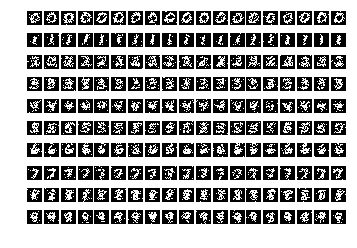

In [119]:
def P10(num_examples):

### STUDENT START ###
    bnb_10 = BernoulliNB()
    bnb_10.fit(mini_train_data, mini_train_labels)

    prob = bnb_10.feature_log_prob_

    for i in range(0,10):
        # setting up 10 columns
        for j in range(1,20):
            transform_loop = np.exp(prob)[i] > np.random.rand(28 * 28)
            plt.subplot(10,num_examples,i*num_examples+j)
            # redering and reshaping to 28x28 ,'gray'
            plt.imshow(transform_loop.reshape(28,28), cmap='gray')
            plt.axis('off')

### STUDENT END ###

P10(20)

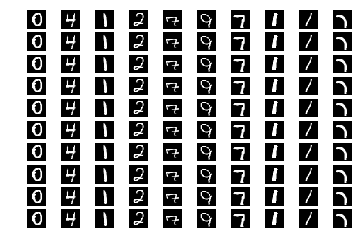

In [122]:
P1(10)

**ANSWER:**
I've also included the digit images from part 1 for reference. Based on the two outputs, the digit images in Bernoulli Naive Bayes are not clear and seem to have holes, which almost looks like blurring. One possible explanation for this is the fact that BernoulliNB re-classified the gray pixels as either black or white (0, 1) which is causing the full 28x28 pixel image to look porous from the distance. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [123]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    first_model = BernoulliNB(alpha = 1.0e-10, binarize = 0.5)
    first_model.fit(mini_train_data, mini_train_labels)
    first_dev = first_model.predict(dev_data)
    first_pred = first_model.predict_proba(dev_data)
    for j in range(len(first_pred)):
        observe = first_pred[x][int(first_dev)]
        for i in range(1,8):
        

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =   0    accuracy = 0.000
p(pred) is 0.9000000000000 to 0.9990000000000    total =   0    accuracy = 0.000
p(pred) is 0.9990000000000 to 0.9999900000000    total =   0    accuracy = 0.000
p(pred) is 0.9999900000000 to 0.9999999000000    total =   0    accuracy = 0.000
p(pred) is 0.9999999000000 to 0.9999999990000    total =   0    accuracy = 0.000
p(pred) is 0.9999999990000 to 0.9999999999900    total =   0    accuracy = 0.000
p(pred) is 0.9999999999900 to 0.9999999999999    total =   0    accuracy = 0.000
p(pred) is 0.9999999999999 to 1.0000000000000    total =   0    accuracy = 0.000


ANSWER: I ran out of time on this one... 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()